# Projet Machine-Learning par Antoine Théologien

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def train_nn(X, y, model, loss, epochs=1000, lr=0.01, batch_size=32, verbose=True):
    losses = []
    n_samples = X.shape[0]
    
    for epoch in range(epochs):
        permutation = np.random.permutation(n_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        
        epoch_loss = 0
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            y_pred = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_pred))
            epoch_loss += batch_loss * X_batch.shape[0] / n_samples
            
            model.zero_grad()
            
            model.backward(X_batch, y_batch, loss)
            
            model.update_parameters(lr)
        
        losses.append(epoch_loss)
        
        if verbose and epoch % 100 == 0:
            # Calcul de l'accuracy
            y_pred_all = model.forward(X)
            accuracy = np.mean((y_pred_all > 0.5) == y)
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}, Accuracy = {accuracy:.4f}")

    return losses, model


Epoch 0: Loss = 1.3119, Accuracy = 0.4790
Epoch 100: Loss = 0.5007, Accuracy = 0.5000
Epoch 200: Loss = 0.5004, Accuracy = 0.5000
Epoch 300: Loss = 0.5002, Accuracy = 0.5000
Epoch 400: Loss = 0.5002, Accuracy = 0.5000
Epoch 500: Loss = 0.5001, Accuracy = 0.5000
Epoch 600: Loss = 0.5001, Accuracy = 0.5000
Epoch 700: Loss = 0.5001, Accuracy = 0.5000
Epoch 800: Loss = 0.5001, Accuracy = 0.5000
Epoch 900: Loss = 0.5001, Accuracy = 0.5000


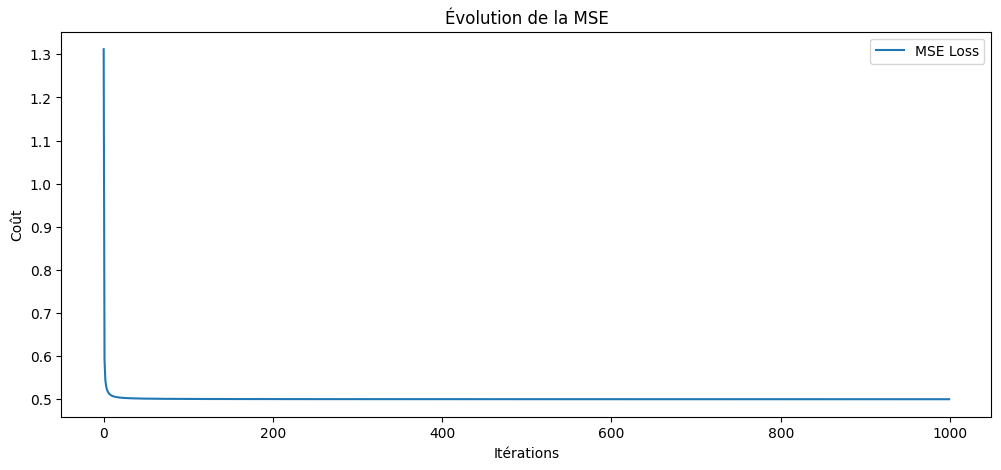

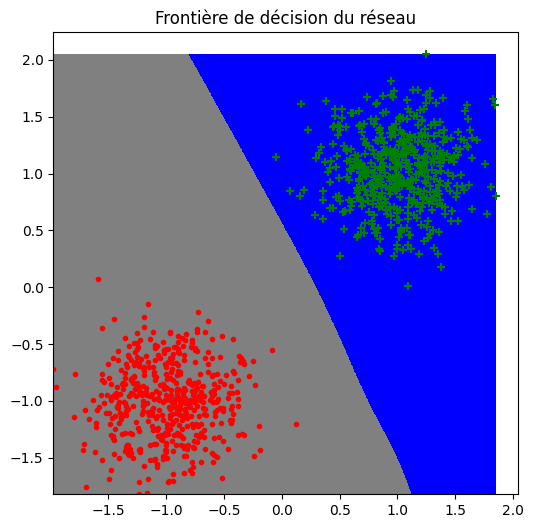

Epoch 0: Loss = 0.8920, Accuracy = 0.2450
Epoch 100: Loss = 0.7542, Accuracy = 0.2480
Epoch 200: Loss = 0.7519, Accuracy = 0.2490
Epoch 300: Loss = 0.7516, Accuracy = 0.2490
Epoch 400: Loss = 0.7514, Accuracy = 0.2490
Epoch 500: Loss = 0.7513, Accuracy = 0.2490
Epoch 600: Loss = 0.7513, Accuracy = 0.2490
Epoch 700: Loss = 0.7512, Accuracy = 0.2490
Epoch 800: Loss = 0.7512, Accuracy = 0.2490
Epoch 900: Loss = 0.7512, Accuracy = 0.2490


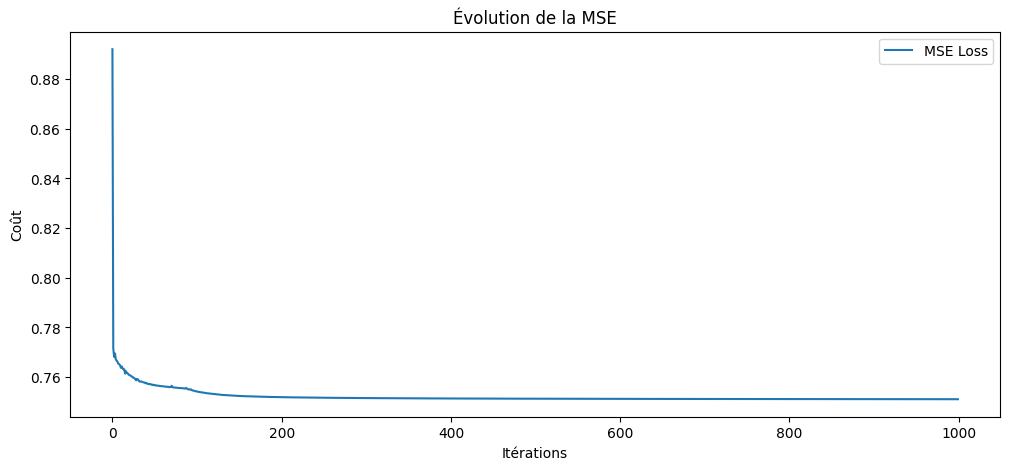

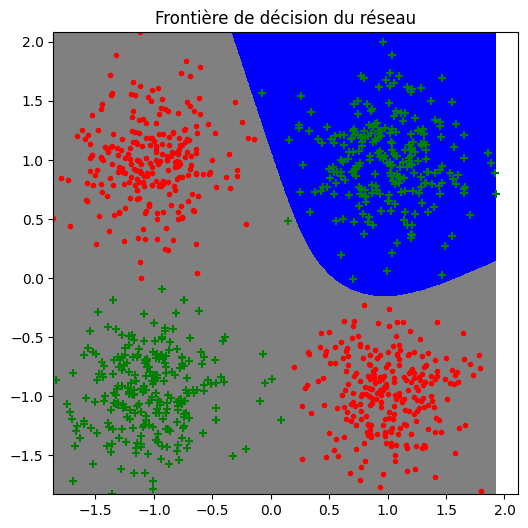

Epoch 0: Loss = 1.2922, Accuracy = 0.0910
Epoch 100: Loss = 0.9995, Accuracy = 0.0000
Epoch 200: Loss = 0.9983, Accuracy = 0.0030
Epoch 300: Loss = 0.9972, Accuracy = 0.0030
Epoch 400: Loss = 1.0000, Accuracy = 0.0000
Epoch 500: Loss = 0.9968, Accuracy = 0.0000
Epoch 600: Loss = 0.9849, Accuracy = 0.0350
Epoch 700: Loss = 0.9849, Accuracy = 0.0190
Epoch 800: Loss = 0.9831, Accuracy = 0.0040
Epoch 900: Loss = 0.9845, Accuracy = 0.0200


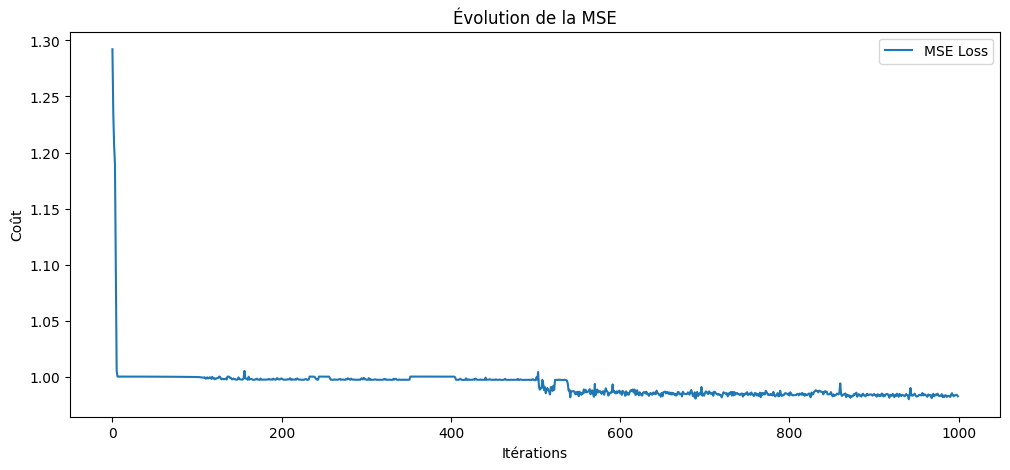

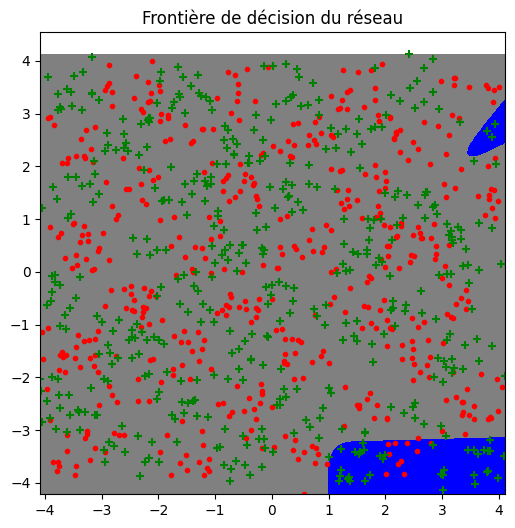

In [4]:
network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5,1),
    Sigmoide()
)


for i in [0,1,2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1) 

    model = network
    loss = MSELoss()

    # Entraînement
    losses, trained_model = train_nn(datax, datay, model, loss, epochs=1000, lr=0.1, batch_size=32)

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model.forward(x)), step=1000)
    plot_data(datax, datay)
    plt.title("Frontière de décision du réseau")
    plt.show()

 

In [3]:
def SGD(network, X_train, y_train, batch_size, epochs, lr):
    loss_fn = MSELoss()
    optimizer = Optim(network, loss_fn, lr)

    for epoch in range(epochs):
        indices = np.random.permutation(len(X_train))
        X_train, y_train = X_train[indices], y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_x = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            optimizer.step(batch_x, batch_y)

        if epoch % 10 == 0:
            y_pred = network.forward(X_train)
            loss = loss_fn.forward(y_train, y_pred)
            print(f"Epoch {epoch}: Loss = {loss.mean():.4f}")

np.random.seed(0)
X_train = np.random.randn(1000, 2)
y_train = (X_train[:, 0] * X_train[:, 1] > 0).astype(float).reshape(-1, 1)  

network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)

SGD(network, X_train, y_train, batch_size=32, epochs=500, lr=0.1)

Epoch 0: Loss = 0.4715
Epoch 10: Loss = 0.1296
Epoch 20: Loss = 0.0998
Epoch 30: Loss = 0.0858
Epoch 40: Loss = 0.0777
Epoch 50: Loss = 0.0721
Epoch 60: Loss = 0.0682
Epoch 70: Loss = 0.0652
Epoch 80: Loss = 0.0627
Epoch 90: Loss = 0.0609
Epoch 100: Loss = 0.0590
Epoch 110: Loss = 0.0576
Epoch 120: Loss = 0.0563
Epoch 130: Loss = 0.0552
Epoch 140: Loss = 0.0542
Epoch 150: Loss = 0.0533
Epoch 160: Loss = 0.0524
Epoch 170: Loss = 0.0519
Epoch 180: Loss = 0.0509
Epoch 190: Loss = 0.0502
Epoch 200: Loss = 0.0495
Epoch 210: Loss = 0.0489
Epoch 220: Loss = 0.0484
Epoch 230: Loss = 0.0477
Epoch 240: Loss = 0.0471
Epoch 250: Loss = 0.0466
Epoch 260: Loss = 0.0462
Epoch 270: Loss = 0.0456
Epoch 280: Loss = 0.0452
Epoch 290: Loss = 0.0447
Epoch 300: Loss = 0.0444
Epoch 310: Loss = 0.0439
Epoch 320: Loss = 0.0434
Epoch 330: Loss = 0.0431
Epoch 340: Loss = 0.0428
Epoch 350: Loss = 0.0425
Epoch 360: Loss = 0.0420
Epoch 370: Loss = 0.0417
Epoch 380: Loss = 0.0415
Epoch 390: Loss = 0.0411
Epoch 400: 

# Pas mal !

Epoch 0: Loss = 1.3401
Epoch 100: Loss = 0.5114
Epoch 200: Loss = 0.5053
Epoch 300: Loss = 0.5034
Epoch 400: Loss = 0.5025


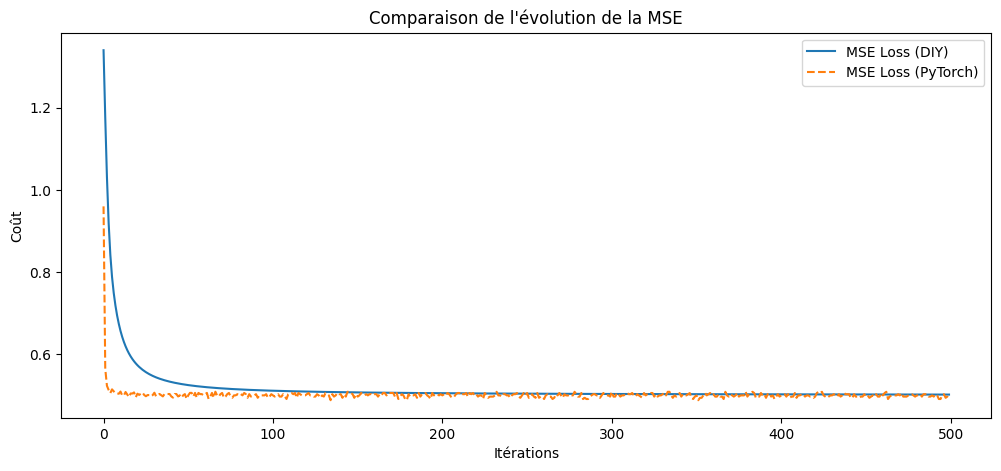

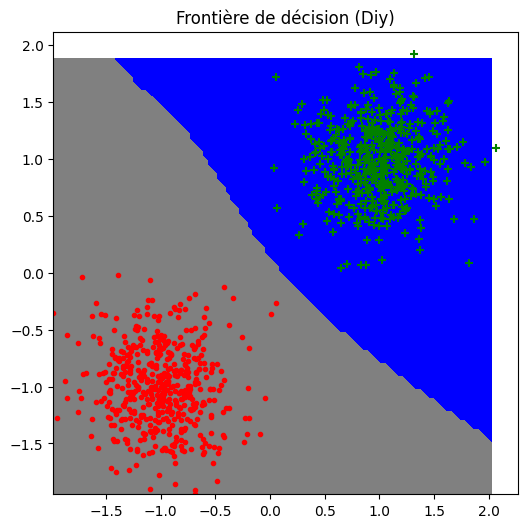

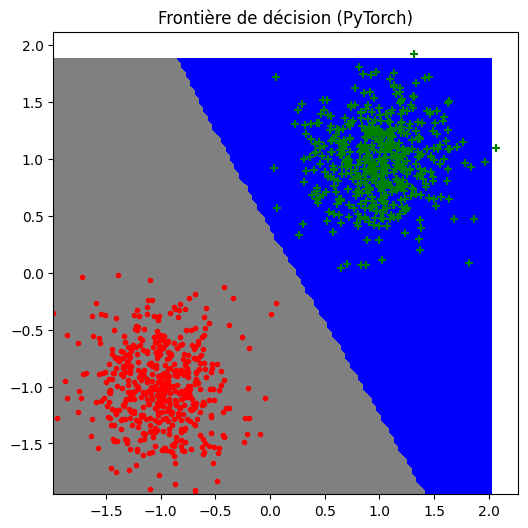

Epoch 0: Loss = 0.8889
Epoch 100: Loss = 0.7566
Epoch 200: Loss = 0.7538
Epoch 300: Loss = 0.7527
Epoch 400: Loss = 0.7521


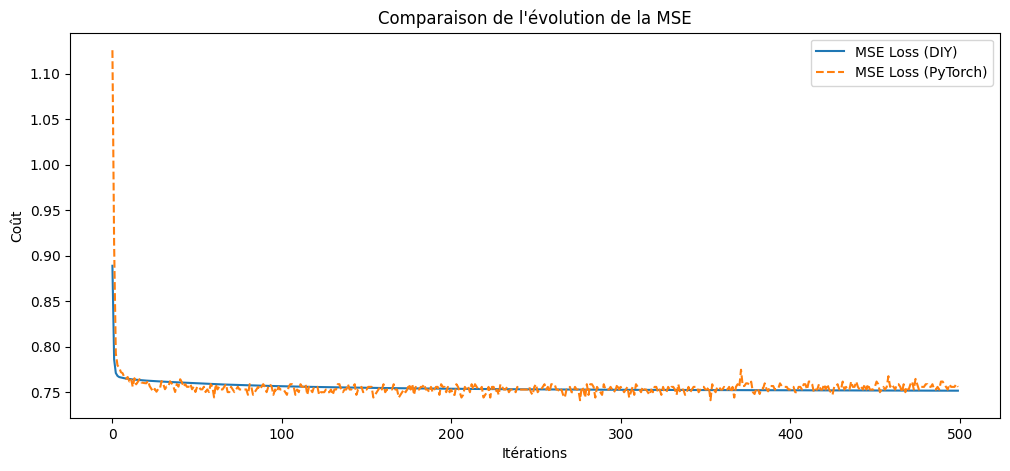

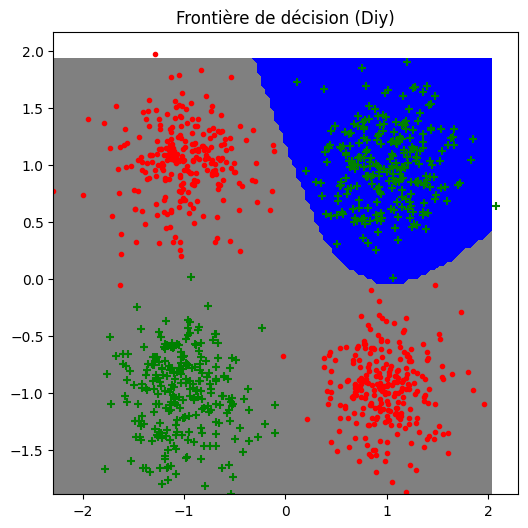

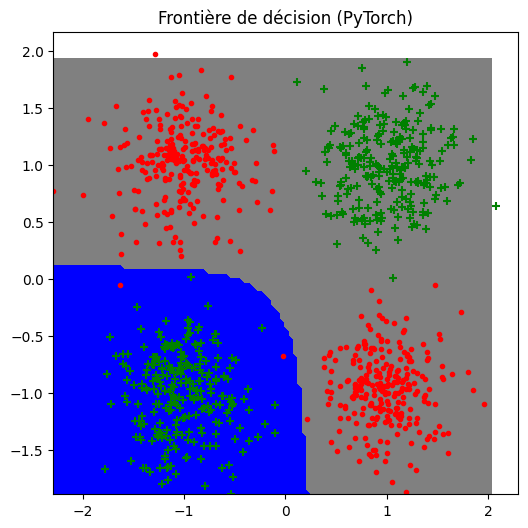

Epoch 0: Loss = 1.2333
Epoch 100: Loss = 0.9933
Epoch 200: Loss = 0.9910
Epoch 300: Loss = 0.9899
Epoch 400: Loss = 0.9890


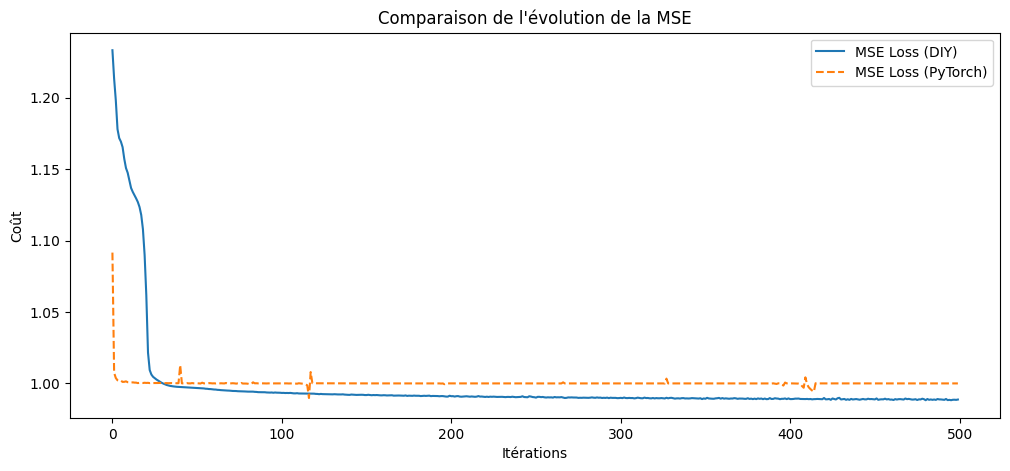

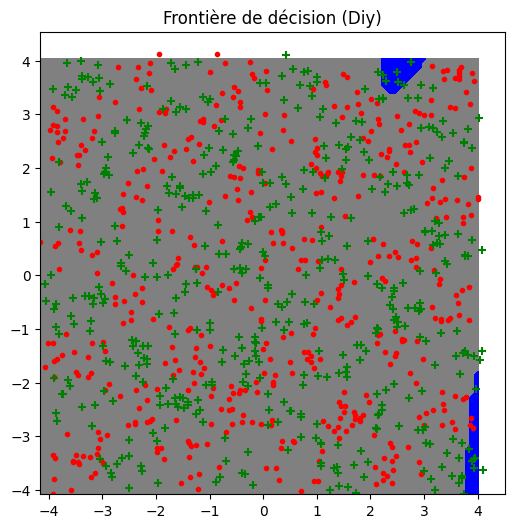

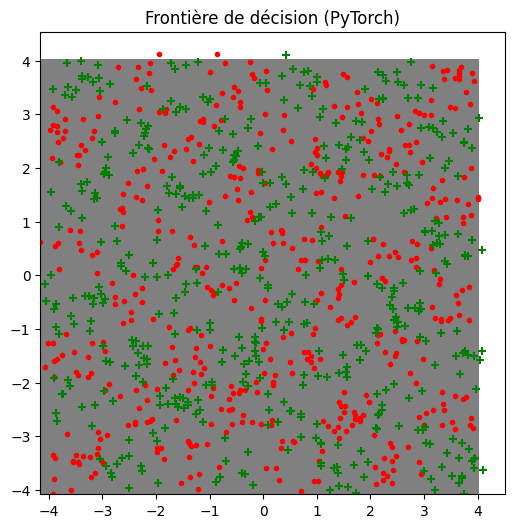

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)


class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

def train_pytorch_nn(X, Y, model, loss_fn, optimizer, epochs=500, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)

    dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_X, batch_Y in dataloader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    
    return losses, model

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    model_diy = network
    loss_diy = MSELoss()
    losses_diy, trained_model_diy = train_nn(datax, datay, model_diy, loss_diy, epochs=500, lr=0.01, batch_size=32)

    model_torch = PyTorchNN()
    loss_torch = nn.MSELoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.01)
    losses_torch, trained_model_torch = train_pytorch_nn(datax, datay, model_torch, loss_torch, optimizer, epochs=500, batch_size=32)

    plt.figure(figsize=(12, 5))
    plt.plot(losses_diy, label="MSE Loss (DIY)")
    plt.plot(losses_torch, label="MSE Loss (PyTorch)", linestyle="dashed")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Comparaison de l'évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_diy.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (Diy)")
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_torch(torch.tensor(x, dtype=torch.float32)).detach().numpy()), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (PyTorch)")
    plt.show()


In [5]:
import numpy as np

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])  # XOR

model = Sequentiel(
    Linear(2, 4),  
    TanH(),
    Linear(4, 1),  
    Sigmoide()
)

loss = MSELoss()  
optime = Optim(model, loss, 0.1)  

def train(net, loss, optime, X_train, y_train, epochs=1000):
    for epoch in range(epochs):
        optime.step(X_train, y_train) 
        if epoch % 100 == 0:
            y_hat = net.forward(X_train)
            print(f"Epoch {epoch}, Loss: {loss.forward(y_train, y_hat).mean()}")

# Entraînement du réseau
train(model, loss, optime, X_train, y_train, epochs=1000)

# Test du modèle
print("\nPrédictions après entraînement :")
print(model.forward(X_train))


Epoch 0, Loss: 0.29087782808644935
Epoch 100, Loss: 0.250476143014664
Epoch 200, Loss: 0.24941792480183156
Epoch 300, Loss: 0.24826856071102218
Epoch 400, Loss: 0.24661206059715451
Epoch 500, Loss: 0.2437994034248027
Epoch 600, Loss: 0.23863415623805775
Epoch 700, Loss: 0.22899608513358422
Epoch 800, Loss: 0.2121443830752866
Epoch 900, Loss: 0.1874115944014173

Prédictions après entraînement :
[[0.33843108]
 [0.5185128 ]
 [0.68867721]
 [0.42967543]]


Epoch 0: Loss = 0.2583
Epoch 100: Loss = 0.0797
Epoch 200: Loss = 0.0689
Epoch 300: Loss = 0.0525
Epoch 400: Loss = 0.0339


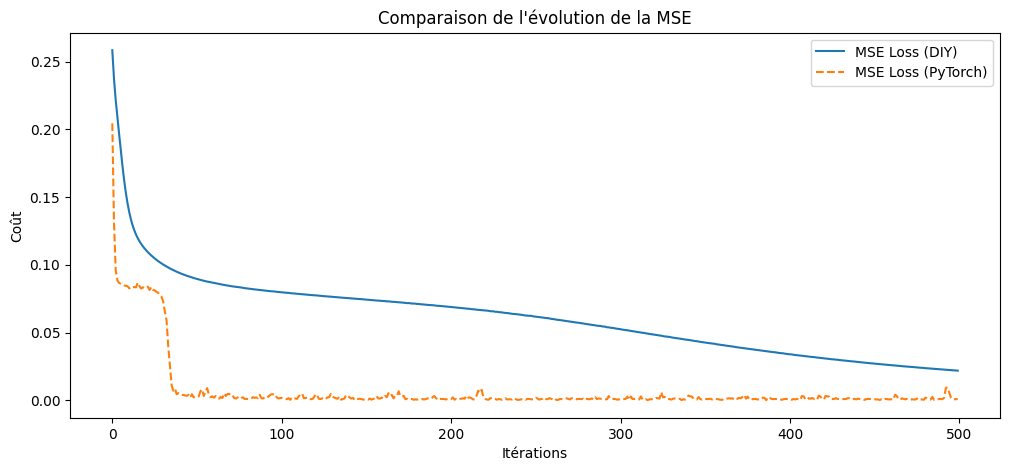

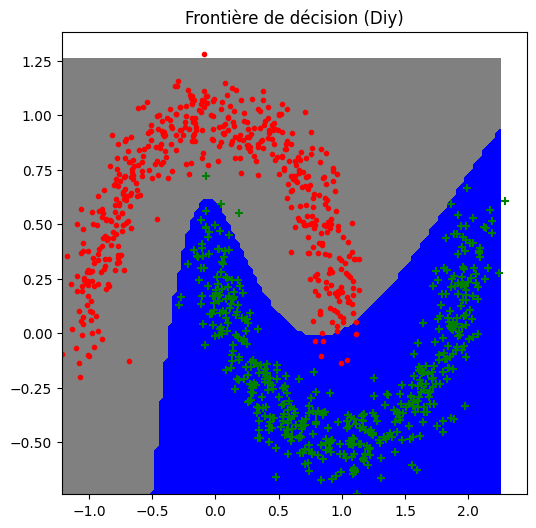

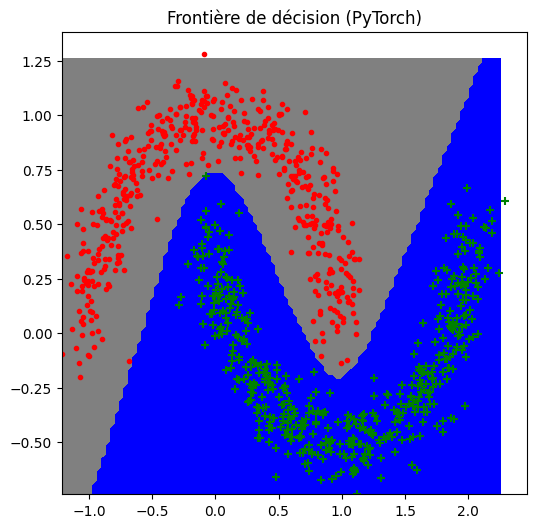

Epoch 0: Loss = 0.3557
Epoch 100: Loss = 0.1840
Epoch 200: Loss = 0.1477
Epoch 300: Loss = 0.1377
Epoch 400: Loss = 0.1317


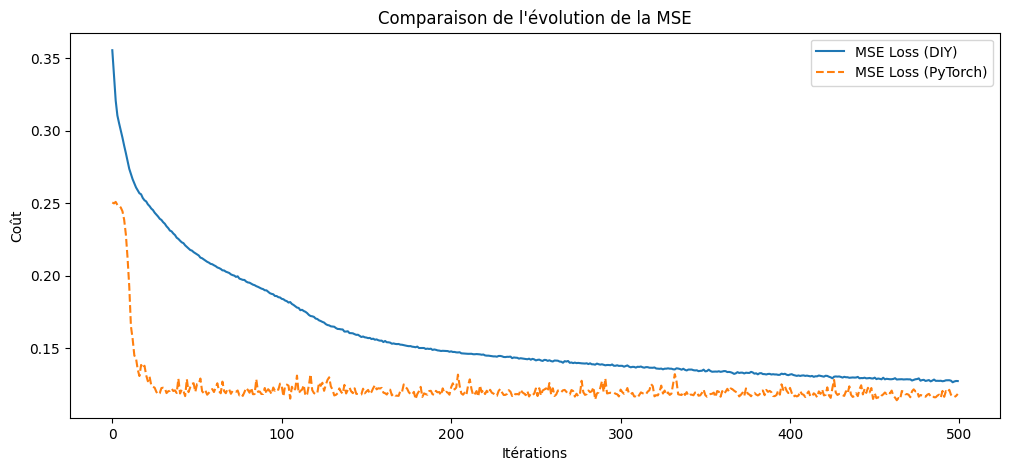

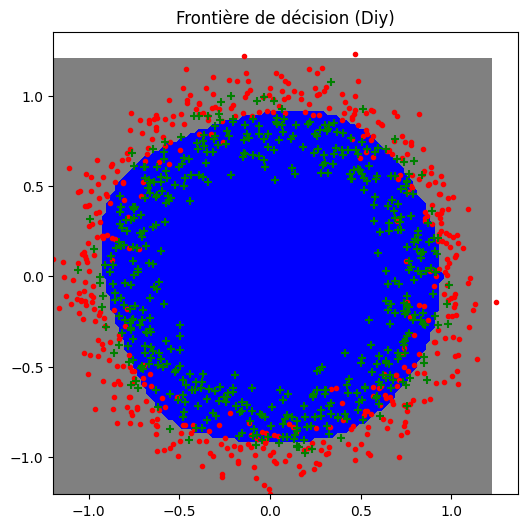

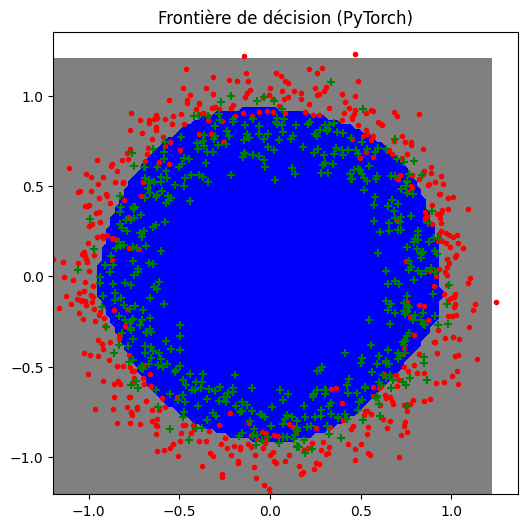

Epoch 0: Loss = 0.4692
Epoch 100: Loss = 0.0213
Epoch 200: Loss = 0.0201
Epoch 300: Loss = 0.0198
Epoch 400: Loss = 0.0195


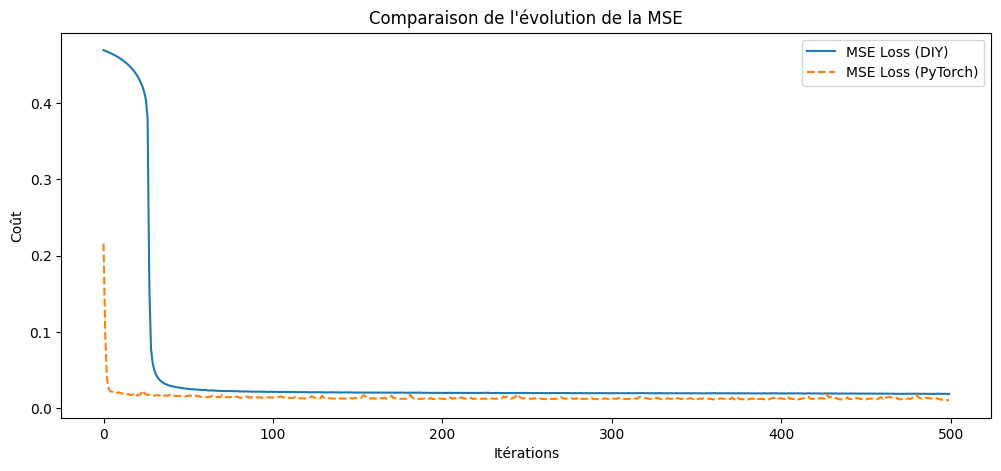

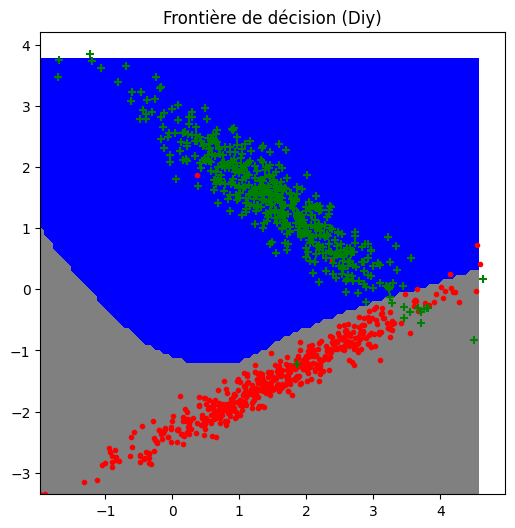

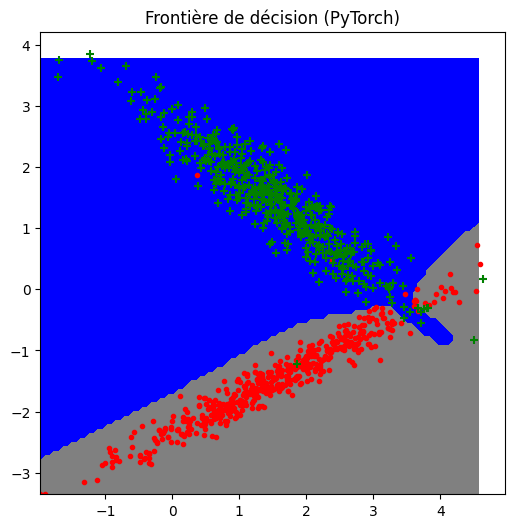

In [ ]:
def train_pytorch_nn(X, Y, model, loss_fn, optimizer, epochs=500, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)

    dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_X, batch_Y in dataloader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    
    return losses, model

network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)

class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

for i in [0, 1, 2]:
    datax, datay = gen_arti2(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    #Modèle DIY
    model_diy = network
    loss_diy = MSELoss()
    losses_diy, trained_model_diy = train_nn(datax, datay, model_diy, loss_diy, epochs=500, lr=0.01, batch_size=64)

    # Modèle PyTorch
    model_torch = PyTorchNN()
    loss_torch = nn.MSELoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.01)
    losses_torch, trained_model_torch = train_pytorch_nn(datax, datay, model_torch, loss_torch, optimizer, epochs=500, batch_size=64)

    plt.figure(figsize=(12, 5))
    plt.plot(losses_diy, label="MSE Loss (DIY)")
    plt.plot(losses_torch, label="MSE Loss (PyTorch)", linestyle="dashed")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Comparaison de l'évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_diy.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (Diy)")
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_torch(torch.tensor(x, dtype=torch.float32)).detach().numpy()), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (PyTorch)")
    plt.show()
